### This is intended to generate a merfish code

### Read zebrafish expression

In [1]:
import pickle,numpy as np
umi_file = r'Data\75percumi.txt'
def read_umi_fl(fl):
    lines = [ln[:-1].split(',') for ln in open(fl,'r')]
    cells = lines[0][1:]
    genes = [ln[0] for ln in lines[1:]]
    M = np.array([ln[1:] for ln in lines[1:]],dtype=np.float32)
    return np.array(cells),np.array(genes),M
cells,genes,X_expr = read_umi_fl(umi_file)
X_expr_all = X_expr.copy()

In [2]:
lines = [ln[:-1].split(',') for ln in open(umi_file,'r')]
cells = lines[0][1:]
genes = [ln[0] for ln in lines[1:]]
M = np.array([ln[1:] for ln in lines[1:]],dtype=np.float32)

### Read zebrafish colors and genes

In [3]:
import pandas,glob
ipl=0
pl = r'Data\library_design_1000genes_v5.xlsx'

cols = ['Stv82','Stv1','Stv79']
plate = pandas.read_excel(pl)

plate = plate[plate['is.top_500']] #first design genes on the top_500 list

In [4]:
plate

,ID,pref.trans.ID,names.zv11,NAMES.zv10,is.TF,is.landmark,is.morph,is.morph.CRISPR,cell.type,is.top_1000,is.top_500,plate,well,tail
0,ENSDARG00000058179,ENSDART00000063665,ackr3b,ACKR3B,False,False,True,True,NaN,True,True,2.0,C8,Stv79
3,ENSDARG00000018968,ENSDART00000023094,acvr1ba,ACVR1BA,False,False,True,False,NaN,True,True,1.0,O22,Stv79
4,ENSDARG00000056250,ENSDART00000078703,add3b,ADD3B,False,False,True,False,NaN,True,True,3.0,H13,Stv79
5,ENSDARG00000039429,ENSDART00000159585,adka,ADKA,False,False,False,False,NaN,True,True,2.0,P5,Stv79
6,ENSDARG00000025372,ENSDART00000037557,admp,ADMP,False,True,False,False,NaN,True,True,2.0,K8,Stv1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,ENSDARG00000110008,ENSDART00000153911,znf1004,ZNF1004,True,False,False,False,NaN,True,True,1.0,O3,Stv1
498,ENSDARG00000103917,ENSDART00000168027,znf185,ZNF185,False,False,False,True,NaN,True,True,2.0,E2,Stv79
499,ENSDARG00000078164,ENSDART00000105514,znf576.2,ZNF576.2,True,False,False,False,NaN,True,True,3.0,C11,Stv1
500,ENSDARG00000008333,ENSDART00000004071,znfl2a,ZNFL2A,True,False,False,False,NaN,True,True,3.0,E24,Stv79


In [5]:
dic_col_gn,dic_gn_well = {},{}
for ipl, well, gn, col in zip(list(plate['plate']), list(plate['well']),list(plate['NAMES.zv10']),list(plate['tail'])):
    icol = cols.index(col)
    dic_col_gn[gn] = icol
    dic_gn_well[gn]='P'+str(int(ipl))+'__'+well

In [6]:
dic_gn_well,dic_col_gn

({'ACKR3B': 'P2__C8',
  'ACVR1BA': 'P1__O22',
  'ADD3B': 'P3__H13',
  'ADKA': 'P2__P5',
  'ADMP': 'P2__K8',
  'AHI1': 'P1__J18',
  'AKAP12B': 'P1__O11',
  'ALCAMB': 'P2__E11',
  'ALDOB': 'P2__G22',
  'ANP32E': 'P2__M8',
  'APEX1': 'P2__E22',
  'APLNRA': 'P1__L14',
  'APLNRB': 'P1__B4',
  'APOC1': 'P1__H3',
  'ARF5': 'P1__C3',
  'ARHGAP5': 'P1__D17',
  'ARL4AA': 'P2__H7',
  'ARL4AB': 'P3__C7',
  'ARL4D': 'P3__C13',
  'ARL6IP5A': 'P3__F6',
  'ASPM': 'P2__O1',
  'ATF6': 'P2__O23',
  'ATOH1C': 'P2__A13',
  'ATP2B1A': 'P2__B11',
  'CR762398.1': 'P3__C15',
  'AURKB': 'P1__G9',
  'AXIN2': 'P1__I22',
  'BACH1B': 'P1__J13',
  'BAMBIA': 'P1__I4',
  'BAZ1B': 'P1__F5',
  'BCL2L1': 'P3__J2',
  'BHLHA15': 'P1__O18',
  'BLF': 'P2__G11',
  'BMP2B': 'P2__O19',
  'BMP4': 'P2__E10',
  'BMP7A': 'P2__A8',
  'BRD2A': 'P1__M1',
  'BTG2': 'P2__L7',
  'C1QBP': 'P3__G18',
  'ZGC:92818': 'P1__O8',
  'CA9': 'P1__P18',
  'CASZ1': 'P1__N4',
  'CBX3A': 'P3__A7',
  'CBX5': 'P3__C8',
  'CCNE2': 'P3__I23',
  'CCNF': 'P

In [7]:
genes = list(genes) #all the genes you have rna seq on
genes_keep = np.sort([gn for gn in dic_col_gn]) ##the genes you have probes for
print(len(genes),len(genes_keep))
X_expr = np.array([X_expr_all[genes.index(gn)] if gn in genes else X_expr_all[0]*0 for gn in genes_keep])

17239 495


#### Note: some gene names from your MERFISH probe names are not in the UMI file of 50% epiboly. Investigate the following names

In [8]:
print([gn for gn in genes_keep if gn not in genes])
len([gn for gn in genes_keep if gn not in genes])

['CDX1A', 'DAND5', 'GPR137BB', 'NR6A1A', 'pcdh8']


5

### Decide the cutoff to exclude the too higly abundant genes.

In [9]:
Xmax = np.max(X_expr,-1)
cutoff = 3####
keep_comb = Xmax<cutoff
print(np.sum(keep_comb))
genes_comb = np.array(genes_keep)[keep_comb]
genes_seq = np.array(genes_keep)[~keep_comb]
X_expr_ = X_expr[keep_comb]
#genes_good = [gn.lower() if 'bx'!=gn.lower()[:2] else gn.upper() for gn in genes_comb]
genes_good = genes_comb

471


In [10]:
igene = [gn=='TA' for gn in genes_keep]
Xmax[igene]

array([2.7160852], dtype=float32)

In [11]:
print(genes_seq)
len(genes_seq)

['AKAP12B' 'ALDOB' 'ANP32E' 'APOC1' 'CDX4' 'DDX4' 'DYNLL1' 'ID3' 'KRT18'
 'KRT4' 'KRT8' 'MSGN1' 'NANOS3' 'NASP' 'NOP58' 'RBM4.3' 'RPL10' 'RPLP0'
 'RPLP2L' 'RPS6' 'SOX32' 'TBX16' 'TUBA8L4' 'XBP1']


24

In [17]:
dic_NMzv11_nmzv10 = dict(zip(plate['NAMES.zv10'], plate['names.zv11']))
dic_NMzv11_col = dict(zip(plate['NAMES.zv10'], plate['tail']))

In [18]:
[(dic_NMzv11_nmzv10[g], dic_gn_well[g], dic_NMzv11_col[g]) for g in genes_seq]

[('akap12b', 'P1__O11', 'Stv1'),
 ('aldob', 'P2__G22', 'Stv79'),
 ('anp32e', 'P2__M8', 'Stv1'),
 ('apoc1', 'P1__H3', 'Stv1'),
 ('cdx4', 'P2__H12', 'Stv79'),
 ('ddx4', 'P2__D17', 'Stv1'),
 ('dynll1', 'P1__O15', 'Stv1'),
 ('id3', 'P1__P10', 'Stv79'),
 ('krt18a.1', 'P1__J9', 'Stv1'),
 ('krt4', 'P1__G23', 'Stv1'),
 ('krt8', 'P1__I8', 'Stv79'),
 ('msgn1', 'P3__A11', 'Stv79'),
 ('nanos3', 'P2__K17', 'Stv79'),
 ('nasp', 'P1__K19', 'Stv1'),
 ('nop58', 'P2__P6', 'Stv1'),
 ('rbm4.3', 'P1__P13', 'Stv1'),
 ('rpl10', 'P3__I5', 'Stv79'),
 ('rplp0', 'P2__A16', 'Stv79'),
 ('rplp2l', 'P1__E22', 'Stv79'),
 ('rps6', 'P2__C12', 'Stv79'),
 ('sox32', 'P1__J6', 'Stv79'),
 ('tbx16', 'P1__D8', 'Stv79'),
 ('tuba8l4', 'P1__F6', 'Stv79'),
 ('xbp1', 'P1__N18', 'Stv79')]

In [12]:
cols = np.array([dic_col_gn[gn]for gn in genes_good])

In [13]:
np.unique(cols)

array([1, 2])

In [14]:
gene_sets = [np.array(genes_good)[cols==col]  for col in np.unique(cols)]
X_expr_sets = [X_expr_[cols==col] for col in np.unique(cols)]
[len(gns)for gns in gene_sets]

[229, 242]

### Want gene_sets and X_expr_sets which is your set of final genes per color and their expression

### Load the library (optional)

In [15]:
import sys,os
sys.path.append(os.path.abspath(r'LibraryDesign3'))
import LibraryTools as lt
names_lib,seqs_lib = lt.fastaread(r'I:\Shared drives\Yinan_Bogdan_SharedDrive\ProbeDesigning\MERFISH\ASBB_L1final.fasta')
len(np.unique([nm.split('__')[-2:] for nm in names_lib if nm[:4]=='MERC']))

FileNotFoundError: [Errno 2] No such file or directory: 'I:\\Shared drives\\Yinan_Bogdan_SharedDrive\\ProbeDesigning\\MERFISH\\ASBB_L1final.fasta'

In [68]:
#import pickle
#pickle.dump([gene_sets,X_expr_sets],open('gene_sets__X_expr_sets.pkl','wb'))

### Get encoding

In [15]:
import os,sys,glob,numpy as np

In [44]:
from tqdm import tqdm
def get_random_keep(N = 120,Nonmin=4,Nonmax=4,keep=1600,min_ham_dist=4):

    codes = np.zeros([keep,N],dtype=np.float32)
    for ikp in tqdm(np.arange(keep)):
        while True:
            Non = np.random.randint(Nonmin,Nonmax+1)
            kp = np.random.choice(N,Non,replace=False)
            cd = codes[ikp].copy()
            cd[kp]=1
            # if tentative code cd is different than all other codes then keep
            codes_ = codes[:ikp]
            if len(codes_)>0:
                dists = np.sum(np.abs(cd-codes_),axis=-1)
                if np.min(dists)>=min_ham_dist:
                #if not np.any(np.all(cd == codes[:ikp],-1)):
                    codes[ikp]=cd
                    break
            else:
                codes[ikp]=cd
                break
    return codes

In [49]:
codes = get_random_keep(N = 40,Nonmin=4,Nonmax=4,keep=471,min_ham_dist=4)

100%|█████████████████████████████████████████████████████████████████████████████| 471/471 [00:00<00:00, 11487.64it/s]


In [28]:
cd = codes[0]
codes_ = codes[1:]


2.0

In [46]:
from scipy.spatial.distance import pdist
np.unique(pdist(codes,metric='hamming')*40,return_counts=True)

(array([4., 6., 8.]), array([ 4724, 34341, 71620], dtype=int64))

In [61]:
import os,sys,glob,numpy as np
def metric_quick(codebook_,nneigh=2):
    #codebook_ = bin_codes[keep].astype(np.float32)
    tree = GpuIndexFlatL2(res, codebook_.shape[1])
    tree.add(codebook_)
    dists, inds_ = tree.search(codebook_, k=nneigh)
    D = dists[:,1:]
    return np.mean(D[:,0])
#from faiss import GpuIndexFlatL2, StandardGpuResources
#res = StandardGpuResources()
def get_min_dist(codebook_):
    
    #tree = GpuIndexFlatL2(res, codebook_.shape[1])
    #tree.add(codebook_)
    #dists, inds_ = tree.search(codebook_, k=2)
    #D = dists[:,1:]
    #return np.min(D)
    _,cts = np.unique([str(cd) for cd in codebook_],return_counts=True)
    return int(np.all(cts==1))
def randomchange(list1,N,Nonmin=4,Nonmax=4,min_ham_dist=4):
    """Randomly switch 2 elements from two lists."""
    list1_ = list1.copy()
    i1 = np.random.randint(len(list1_))
    Non = np.random.randint(Nonmin,Nonmax+1)
    cmb = np.random.choice(N,Non,replace=False)
    list1_[i1] = 0
    list1_[i1][cmb] = 1
    
    #if not np.any(np.all(list1_[i1]==list1,axis=-1)):
    #    return list1_
    dists = np.sum(np.abs(list1_[i1]-list1),axis=-1)
    if np.min(dists)>=min_ham_dist:
        return list1_
    else:
        return list1

def randomswap(icode):
    """Randomly switch 2 elements from two lists."""
    icode_ = icode.copy()
    i1 = np.random.randint(len(icode_))
    i2 = np.random.randint(len(icode_))
    icode_[i1],icode_[i2] = icode[i2],icode[i1]
    return icode_

def get_random_keep(N = 120,Nonmin=4,Nonmax=4,keep=1600,min_ham_dist=4):

    codes = np.zeros([keep,N],dtype=np.float32)
    for ikp in np.arange(keep):
        while True:
            Non = np.random.randint(Nonmin,Nonmax+1)
            kp = np.random.choice(N,Non,replace=False)
            cd = codes[ikp].copy()
            cd[kp]=1
            # if tentative code cd is different than all other codes then keep
            codes_ = codes[:ikp]
            if len(codes_)>0:
                dists = np.sum(np.abs(cd-codes_),axis=-1)
                if np.min(dists)>=min_ham_dist:
                #if not np.any(np.all(cd == codes[:ikp],-1)):
                    codes[ikp]=cd
                    break
            else:
                codes[ikp]=cd
                break
    return codes


def balance_genes_bad(X_expr, code,Nbits=30,Nonmin=4,Nonmax=4, Niter = 30000,beta = 1000):
    """Balances the bits used in bin_code[keep] by swapping indices into keep"""

    m_abs = metric_genes(X_expr,code)
    m0 = m_abs
    
    ms = []
    ms_ = []
    code_final = None
    code_start= code.copy()
    for irep in tqdm(range(Niter)):
        code_ = randomchange(code,Nbits,Nonmin,Nonmax)  # switch two elements
        code_ = randomswap(code_)
        m_ = metric_genes(X_expr,code_)  # evaluate how uniform
        if m_ < m_abs:
            code = code_.copy()
            m0 = m_
            m_abs = m_
            code_final = code.copy()
            ms.append(m_abs)
            ms_.append(m_)
        else:
            
            p = np.exp((m_abs - m_) * beta)#p = np.exp((m0 - m_) * beta)
            #print(p,m_abs,m_)
            if np.random.rand() < p:
                code = code_.copy()
                m0 = m_
                ms_.append(m_)
    if code_final is None:
        return code_start,[],[]
    return code_final, ms_, ms


def metric_genes(X_expr_,code_):
    code__ = code_==1
    rs = []
    for ib in range(code__.shape[-1]):
        cd_bit = code__[:,ib]
        #X_expr_max = np.max(X_expr_,axis=0)
        X__ = X_expr_[:,cd_bit]
        if X__.shape[-1]>0:
            #dif = np.max(X__,axis=-1)-np.min(X__,axis=-1)
            #max_min = np.mean(dif)+np.max(dif)+np.sum(np.max(X__,axis=0))
            #max_min = np.max(np.sum(X__,axis=-1)[:,np.newaxis]-X__)
            
            X_int = np.sum(X__,axis=-1)[:,np.newaxis]-X__
            
            max_min = np.sum(np.mean(X_int,axis=0))
            
            #X__ = np.max(X__,axis=0)
            #max_min = np.mean(np.sum(X__,axis=-1)[np.newaxis]-X__)
             
            rs.append(max_min)
    #rs = np.array(rs)
    return np.sum(rs)


def read_umi_fl(fl):
    lines = [ln[:-1].split(',') for ln in open(fl,'r')]
    cells = lines[0][1:]
    genes = [ln[0] for ln in lines[1:]]
    M = np.array([ln[1:] for ln in lines[1:]],dtype=np.float32)
    return np.array(cells),np.array(genes),M

In [52]:
import pickle
pickle.dump([gene_sets,X_expr_sets],open('gene_sets__X_expr_sets_BB.pkl','wb'))

In [55]:
import pickle
gene_sets,X_expr_sets = pickle.load(open('gene_sets__X_expr_sets_BB.pkl','rb'))
#gene_sets_,X_expr_sets_
for icol in range(len(gene_sets)):
    gns_set = gene_sets[icol]
    X_expr_set = X_expr_sets[icol]
    blanks = ['blank_c'+str(icol)+'_'+str(i).zfill(4) for i in range(len(gns_set))]
    X_blank = X_expr_set.copy()
    gene_sets[icol] = np.concatenate([gns_set,blanks])
    X_expr_sets[icol] = np.concatenate([X_expr_set,X_blank])

  0%|          | 0/2000 [00:00<?, ?it/s]

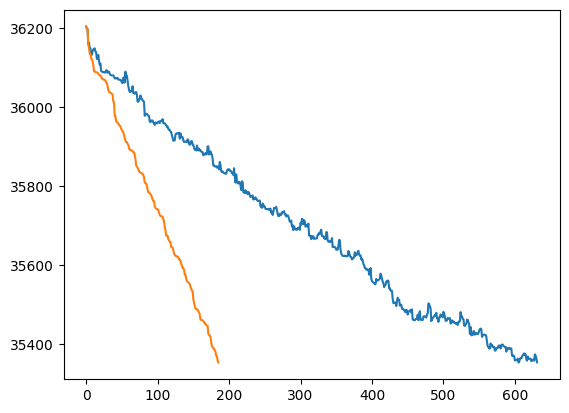

  0%|          | 0/20000 [00:00<?, ?it/s]

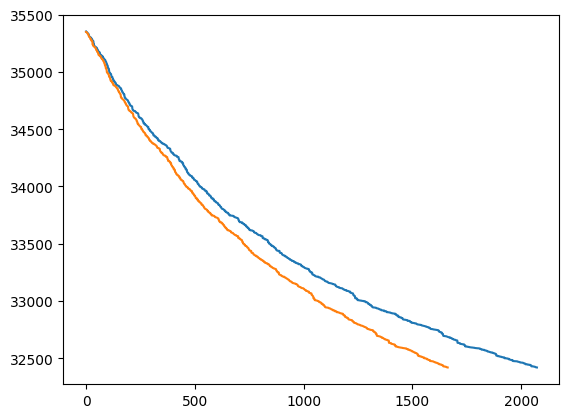

  0%|          | 0/20000 [00:00<?, ?it/s]

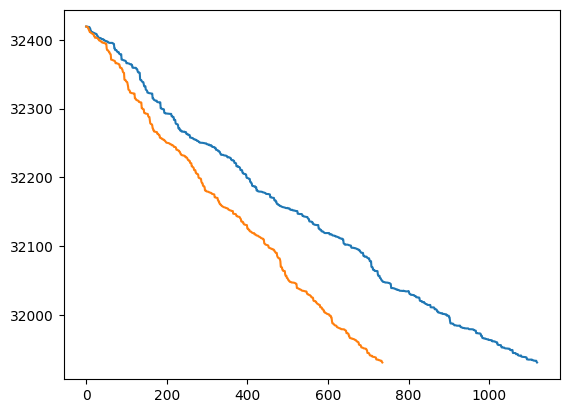

  0%|          | 0/20000 [00:00<?, ?it/s]

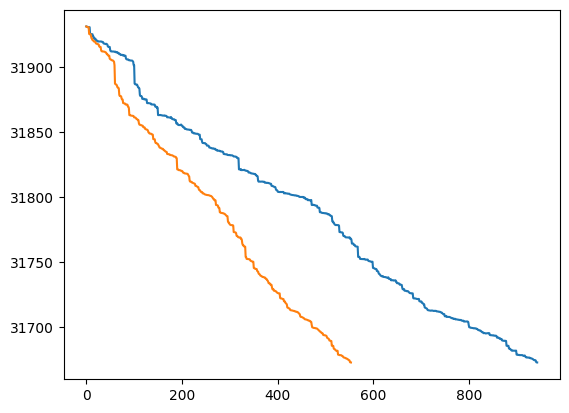

  0%|          | 0/20000 [00:00<?, ?it/s]

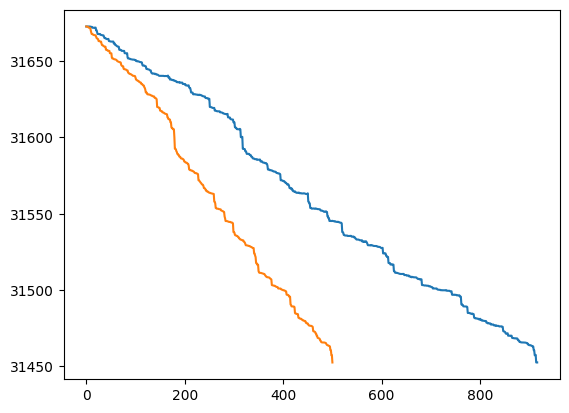

  0%|          | 0/20000 [00:00<?, ?it/s]

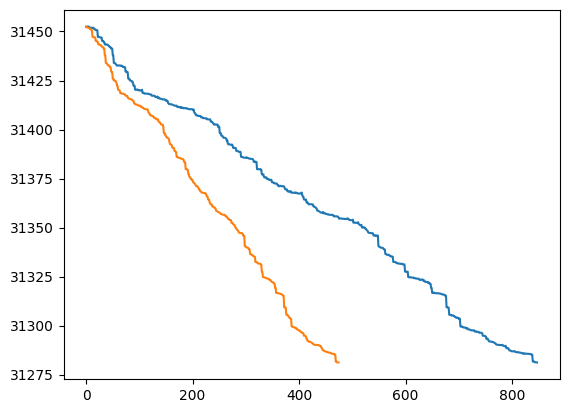

  0%|          | 0/20000 [00:00<?, ?it/s]

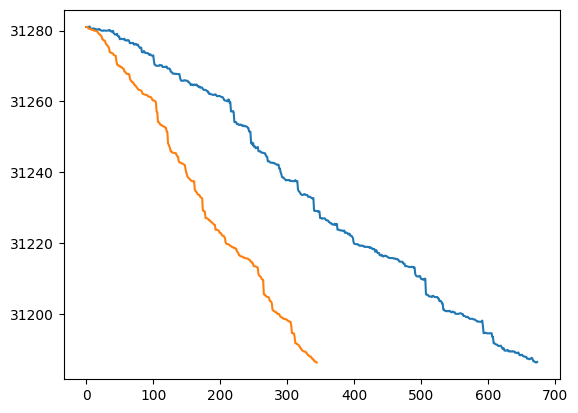

  0%|          | 0/20000 [00:00<?, ?it/s]

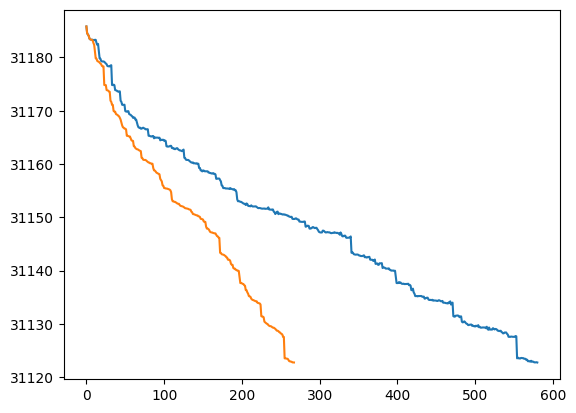

  0%|          | 0/20000 [00:00<?, ?it/s]

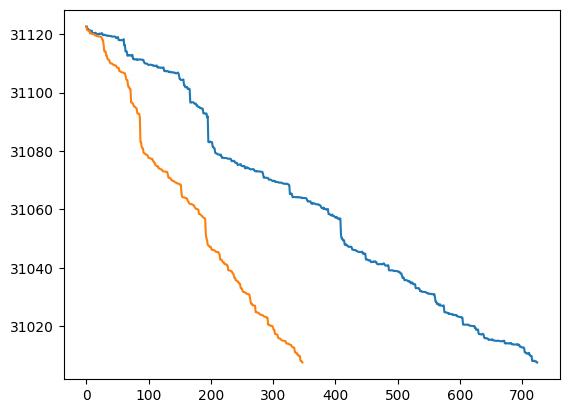

  0%|          | 0/20000 [00:00<?, ?it/s]

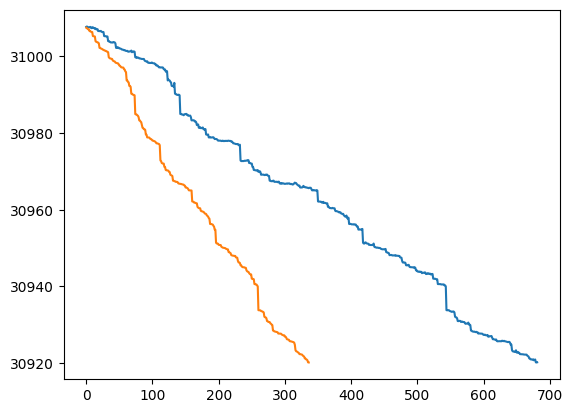

  0%|          | 0/20000 [00:00<?, ?it/s]

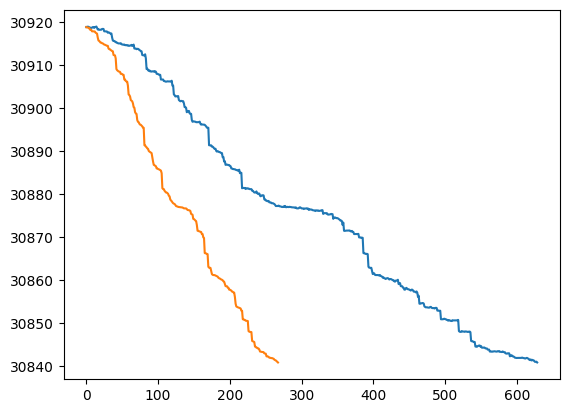

  0%|          | 0/20000 [00:00<?, ?it/s]

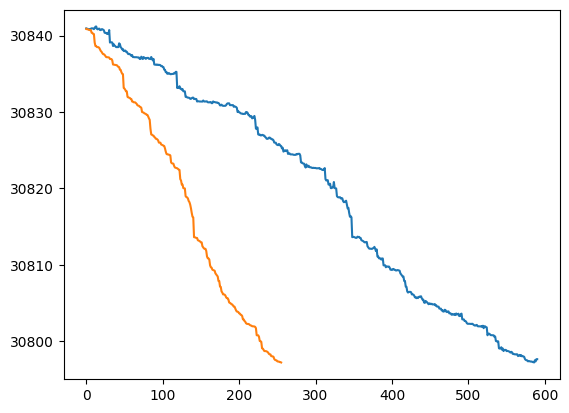

  0%|          | 0/20000 [00:00<?, ?it/s]

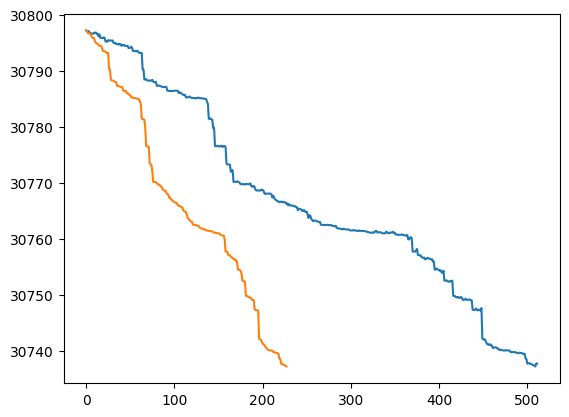

  0%|          | 0/20000 [00:00<?, ?it/s]

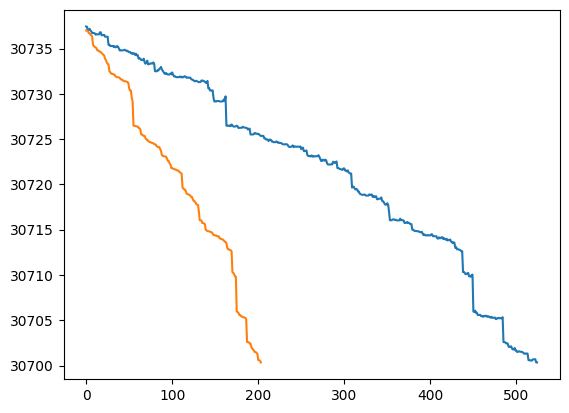

  0%|          | 0/20000 [00:00<?, ?it/s]

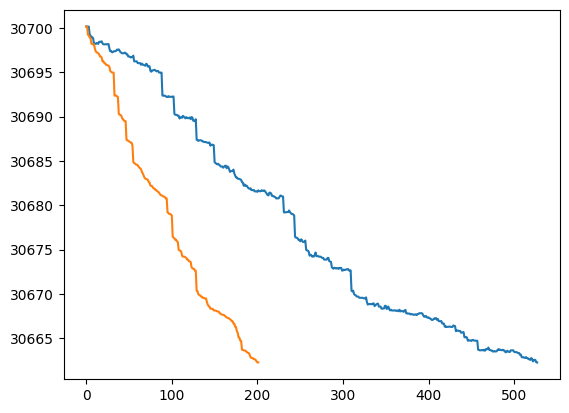

  0%|          | 0/20000 [00:00<?, ?it/s]

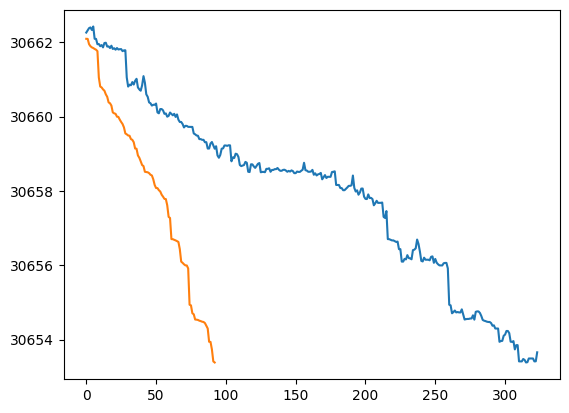

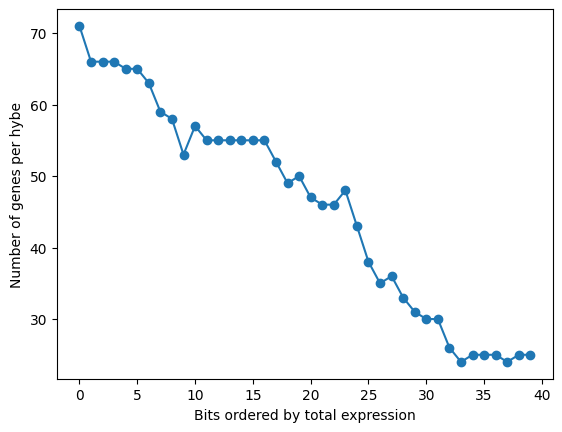

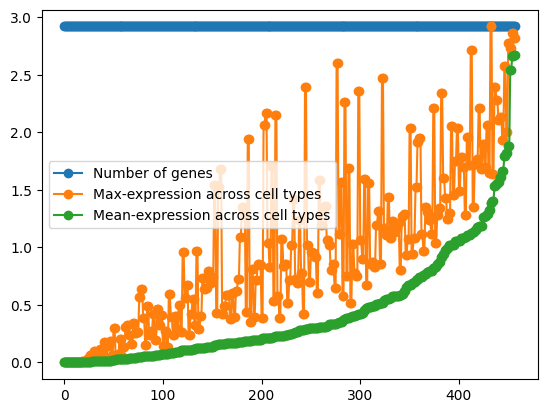

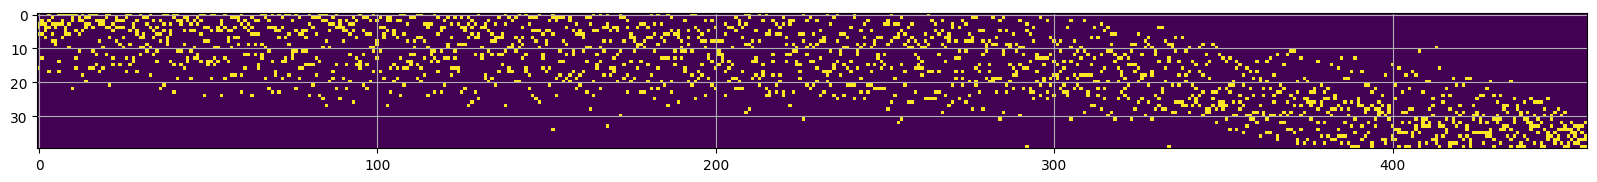

  0%|          | 0/2000 [00:00<?, ?it/s]

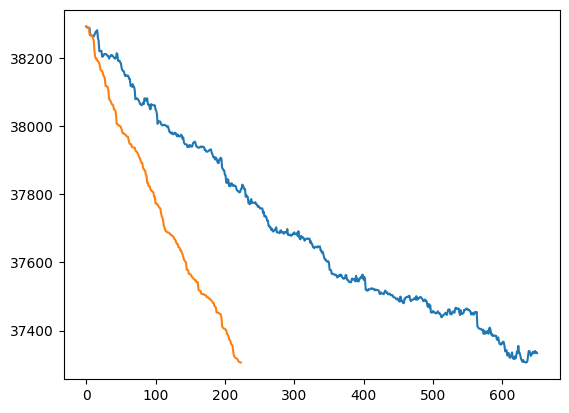

  0%|          | 0/20000 [00:00<?, ?it/s]

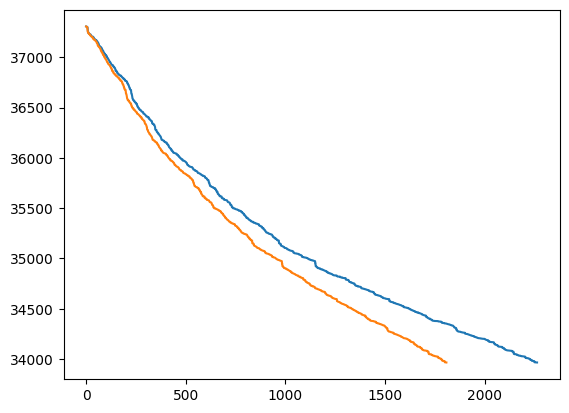

  0%|          | 0/20000 [00:00<?, ?it/s]

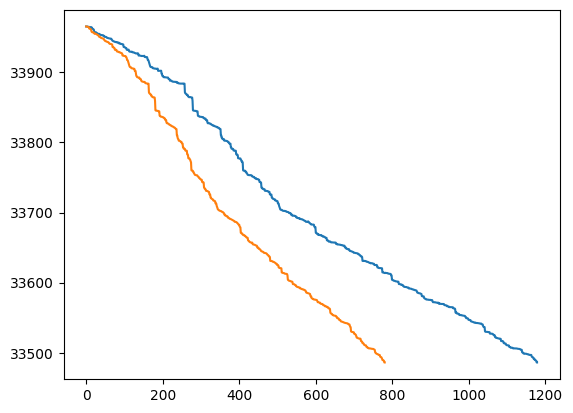

  0%|          | 0/20000 [00:00<?, ?it/s]

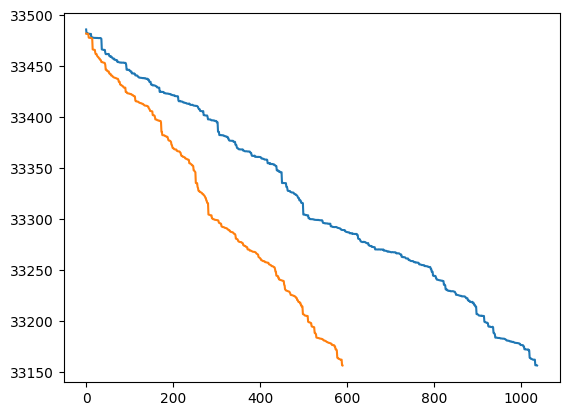

  0%|          | 0/20000 [00:00<?, ?it/s]

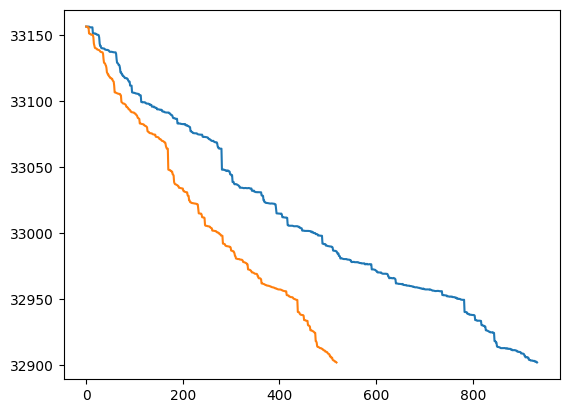

  0%|          | 0/20000 [00:00<?, ?it/s]

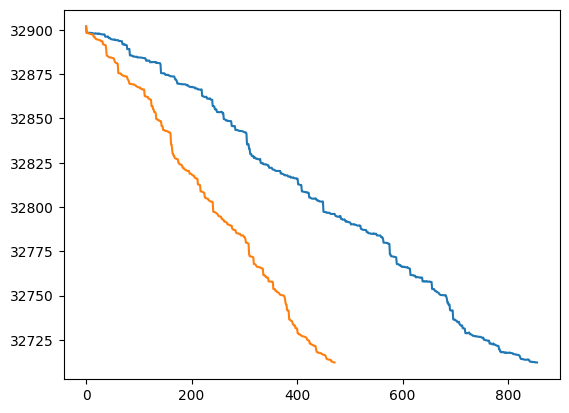

  0%|          | 0/20000 [00:00<?, ?it/s]

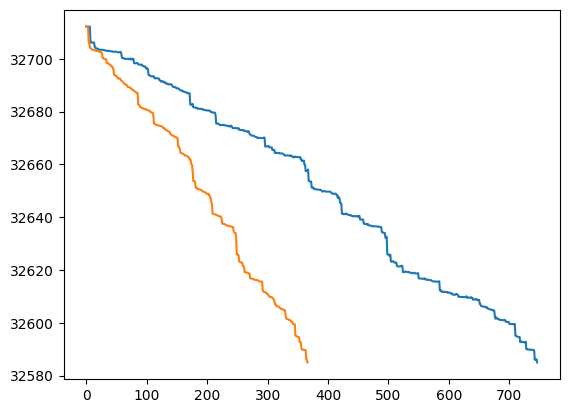

  0%|          | 0/20000 [00:00<?, ?it/s]

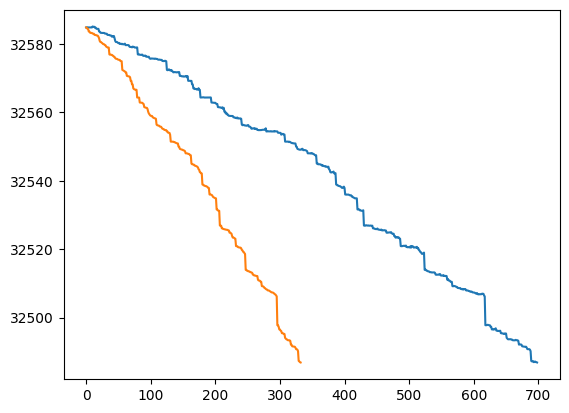

  0%|          | 0/20000 [00:00<?, ?it/s]

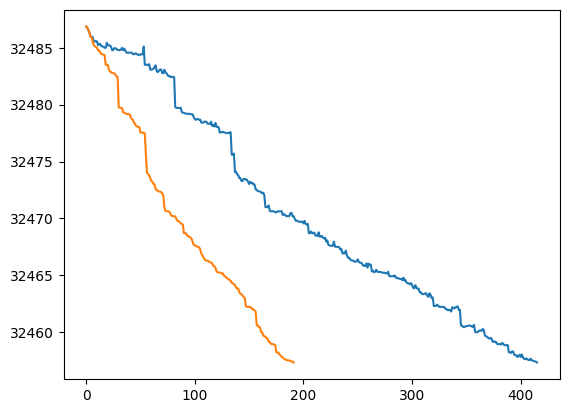

  0%|          | 0/20000 [00:00<?, ?it/s]

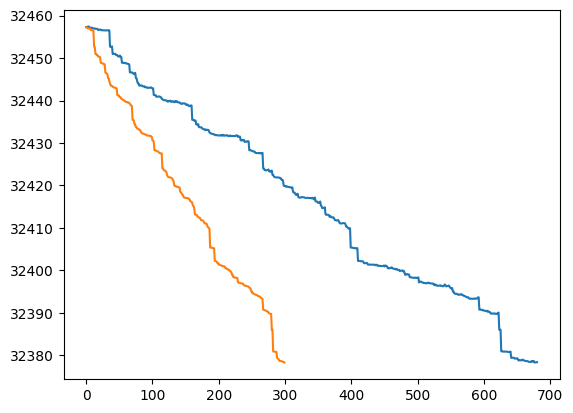

  0%|          | 0/20000 [00:00<?, ?it/s]

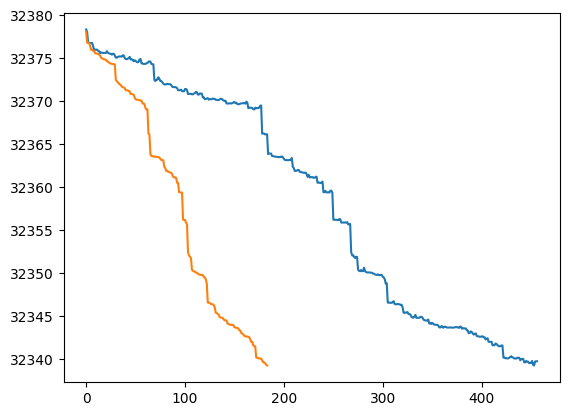

  0%|          | 0/20000 [00:00<?, ?it/s]

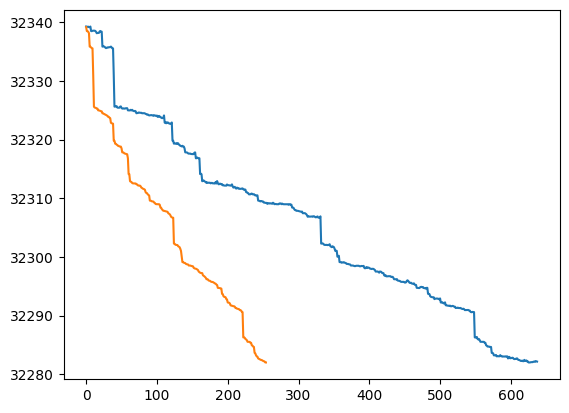

  0%|          | 0/20000 [00:00<?, ?it/s]

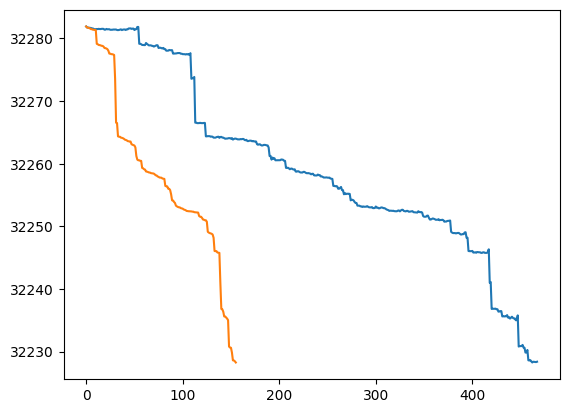

  0%|          | 0/20000 [00:00<?, ?it/s]

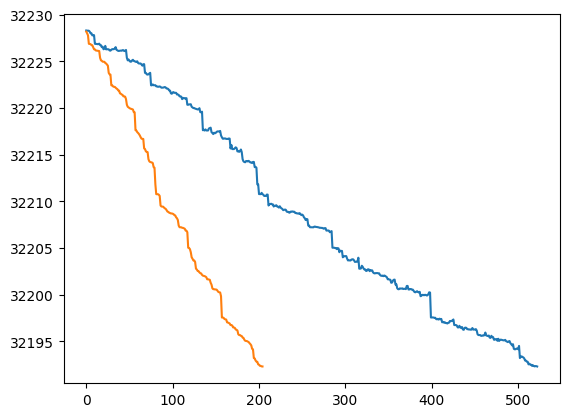

  0%|          | 0/20000 [00:00<?, ?it/s]

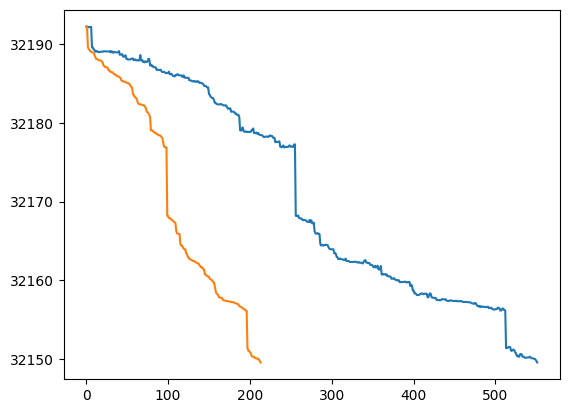

  0%|          | 0/20000 [00:00<?, ?it/s]

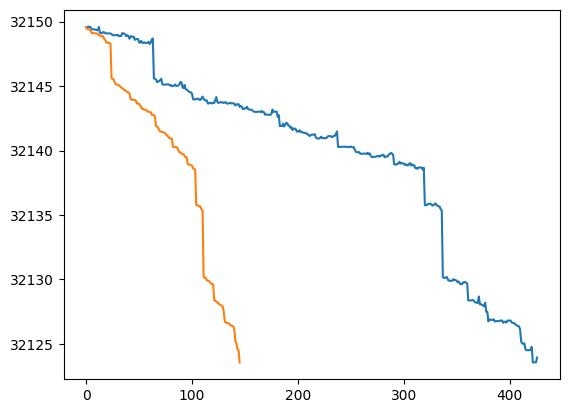

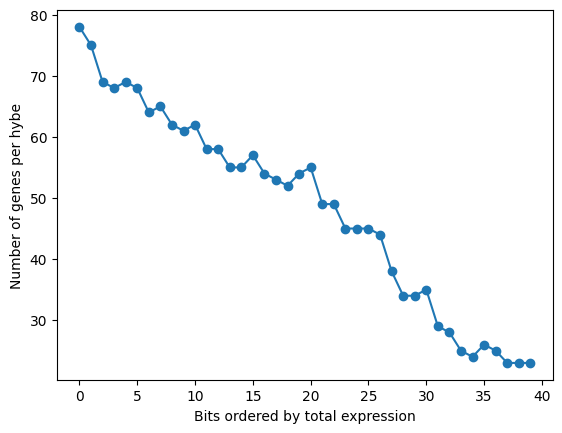

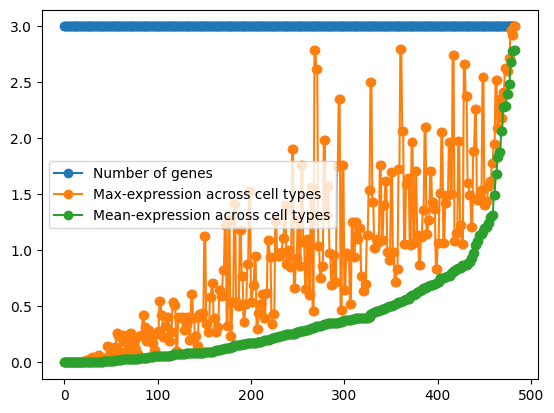

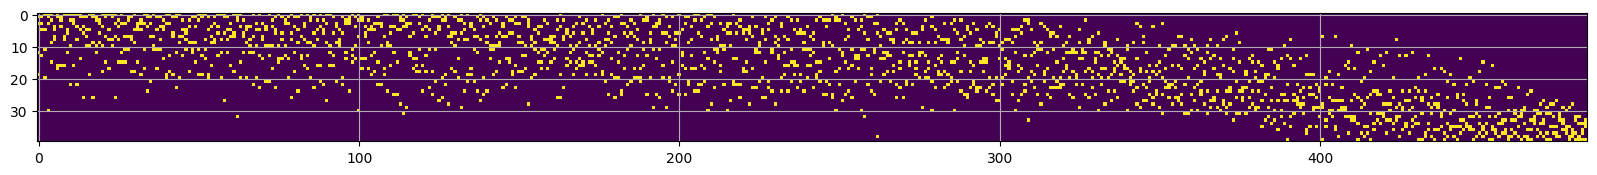

In [65]:
Nhybes = 40 ### Changed
Nonmin=4
Nonmax=4

from tqdm.notebook import tqdm
from matplotlib.pylab import plt
for icol in range(len(X_expr_sets)):
    save_fl = r'.\Lib1000\BB_MERFISH_code_color_Zebra'+str(icol)+'__comb'+str(Nhybes)+'-'+str(Nonmin)+'-'+str(Nonmax)+'_TOME.pkl'

    if not os.path.exists(save_fl):
        X_expr_ = X_expr_sets[icol].T
        #X_expr_ = 0*X_expr_+1
        Ngns = len(X_expr_[-1])

        code = get_random_keep(N=Nhybes,Nonmin=Nonmin,Nonmax=Nonmax,keep=Ngns)
        code, ms_, ms = balance_genes_bad(X_expr_, code,Nbits=Nhybes,Nonmin=Nonmin,Nonmax=Nonmax, Niter = 2000,beta = 0.1)
        plt.plot(ms_)
        plt.plot(ms)
        plt.show()
        for i in range(15):
            code, ms_, ms = balance_genes_bad(X_expr_, code,Nbits=Nhybes,Nonmin=Nonmin,Nonmax=Nonmax, Niter = 20000,beta = 10)
            plt.plot(ms_)
            plt.plot(ms)
            plt.show()
        pickle.dump([code,X_expr_,gene_sets[icol]],open(save_fl,'wb'))

    else:
        code,X_expr_,gns_ = pickle.load(open(save_fl,'rb'))

    bit_expr = np.dot(X_expr_,code)
    plt.figure()
    plt.plot(np.sum(code,axis=0)[np.argsort(np.mean(bit_expr,axis=0))],'o-')
    plt.ylabel('Number of genes per hybe')
    plt.xlabel('Bits ordered by total expression')
    #plt.ylim([0,15])

    index = np.argsort(np.mean(X_expr_,axis=0))

    plt.figure()
    max_ = np.max(X_expr_)
    max__ = np.max(np.sum(code,axis=1))
    plt.plot(np.sum(code,axis=1)[index]/max__*max_,'o-',label='Number of genes')
    plt.plot(np.max(X_expr_,axis=0)[index],'o-',label='Max-expression across cell types')
    plt.plot(np.mean(X_expr_,axis=0)[index],'o-',label='Mean-expression across cell types')
    #plt.ylim([0,15])
    plt.legend()

    plt.figure(figsize=(20,20))
    plt.imshow(code[index].T[np.argsort(np.mean(bit_expr,axis=0))])
    plt.grid()
    plt.show()

In [63]:
code

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [66]:
from scipy.spatial.distance import pdist
np.unique(pdist(code,metric='hamming')*40,return_counts=True)

(array([4., 6., 8.]), array([ 7081, 36927, 72878], dtype=int64))

## Generate robot script using the 500-gene plate format, mix Cy3 and Cy5 oligos already

In [67]:
import pandas,glob
ipl=0
pl = r'.\Lib1000\library_design_500genes.xlsx'
plate = pandas.read_excel(pl)

cols = ['Stv82','Stv1','Stv79']

dic_col_gn,dic_gn_well = {},{}
for ipl, well, gn, col in zip(list(plate['plate']), list(plate['well']),list(plate['NAMES.zv10']),list(plate['tail'])):
    icol = cols.index(col)
    dic_col_gn[gn] = icol
    dic_gn_well[gn]='P'+str(int(ipl))+'__'+well

In [86]:
import pickle
import numpy as np
Nhybes = 40
Nonmin=4
Nonmax=4

well_pos = [let+str(i+1) for i in range(24) for let in 'ABCDEFGHIJKLMNOP' ]
dic_num_wellpose = dict(zip(well_pos, range(len(well_pos))))
script_fl = r'.\Lib1000\PipettRobot\ASYW2_MERFISH_scheme__comb'+str(Nhybes)+'-'+str(Nonmin)+'-'+str(Nonmax)+'_500genes.gwl'
f = open(script_fl, "w")

for icol in [0, 1]:
    print('Color '+str(icol))
    codebook_fl = r'.\Lib1000\BB_MERFISH_code_color_Zebra'+str(icol)+'__comb'+str(Nhybes)+'-'+str(Nonmin)+'-'+str(Nonmax)+'_TOME.pkl'
    code,X_expr_,gns_ = pickle.load(open(codebook_fl,'rb'))
    
    bad_gns = np.array(['blank' in e for e in gns_])
    code = code[~bad_gns,]

    wells = [[dic_gn_well[gn] for gn in gns_[np.where(cd)[0]]] for cd in code.T]
    unique_wells = np.unique([item for sublist in wells for item in sublist])

    for well in unique_wells:
        pl,w = well.split('__')
        tubes = [t for t,w in enumerate(wells) if well in w]
        f.write('A;plate'+pl[-1]+';;384 Well Plate;'+str(dic_num_wellpose[w]+1)+';;8;;;\n')
        f.write('D;CollectionPlate;;96 Well DeepWell;'+str(tubes[0]+1)+';;8;;;\n')
        f.write('A;plate'+pl[-1]+';;384 Well Plate;'+str(dic_num_wellpose[w]+1)+';;8;;;\n')
        f.write('D;CollectionPlate;;96 Well DeepWell;'+str(tubes[1]+1)+';;8;;;\n')
        f.write('A;plate'+pl[-1]+';;384 Well Plate;'+str(dic_num_wellpose[w]+1)+';;8;;;\n')
        f.write('D;CollectionPlate;;96 Well DeepWell;'+str(tubes[2]+1)+';;8;;;\n')
        f.write('A;plate'+pl[-1]+';;384 Well Plate;'+str(dic_num_wellpose[w]+1)+';;8;;;\n')
        f.write('D;CollectionPlate;;96 Well DeepWell;'+str(tubes[3]+1)+';;8;;;\n')
        f.write('W;\n')
f.close()

Color 0
Color 1


## Generate codebook.csv

In [87]:
dic_NMzv11_nmzv10 = dict(zip(plate['NAMES.zv10'], plate['names.zv11']))

In [88]:
import pickle
Nhybes = 40
Nonmin=4
Nonmax=4

save_fl_Cy3 = r'.\Lib1000\BB_MERFISH_code_color_Zebra1__comb'+str(Nhybes)+'-'+str(Nonmin)+'-'+str(Nonmax)+'_TOME.pkl'
code_Cy3,X_expr_,gns_Cy3 = pickle.load(open(save_fl_Cy3,'rb'))

save_fl_Cy5 = r'.\Lib1000\BB_MERFISH_code_color_Zebra0__comb'+str(Nhybes)+'-'+str(Nonmin)+'-'+str(Nonmax)+'_TOME.pkl'
code_Cy5,X_expr_,gns_Cy5 = pickle.load(open(save_fl_Cy5,'rb'))

In [89]:
import pandas as pd
bits = ['bit'+str(i) for i in range(1,81)]
codebook = pd.DataFrame(columns=['name', 'id']+ bits)

In [91]:
import numpy as np
#names = [dic_NMzv11_nmzv10[n] for n in np.concatenate([gns_Cy3, gns_Cy5])]
names = [dic_NMzv11_nmzv10[n] if "blank" not in n else n for n in np.concatenate([gns_Cy3, gns_Cy5])]
codebook['name'] = names
codebook['id'] = names
codebook[bits] = 0
Cy3_bits = ['bit'+str(i) for i in range(1,81,2)]
for i,b in enumerate(Cy3_bits):
    codebook[b][0:len(gns_Cy3)] = code_Cy3[:,i]
Cy5_bits = ['bit'+str(i) for i in range(2,81,2)]
for i,b in enumerate(Cy5_bits):
    codebook[b][len(gns_Cy3):] = code_Cy5[:,i]

C:\Users\wan0000\AppData\Local\Temp\ipykernel_11836\4202816360.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  codebook[b][0:len(gns_Cy3)] = code_Cy3[:,i]
C:\Users\wan0000\AppData\Local\Temp\ipykernel_11836\4202816360.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  codebook[b][len(gns_Cy3):] = code_Cy5[:,i]


In [92]:
codebook

,name,id,bit1,bit2,bit3,bit4,bit5,bit6,bit7,bit8,...,bit71,bit72,bit73,bit74,bit75,bit76,bit77,bit78,bit79,bit80
0,ackr3b,ackr3b,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,acvr1ba,acvr1ba,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,add3b,add3b,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,adka,adka,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,ahi1,ahi1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,blank_c0_0224,blank_c0_0224,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
938,blank_c0_0225,blank_c0_0225,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
939,blank_c0_0226,blank_c0_0226,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,blank_c0_0227,blank_c0_0227,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [93]:
codebook.to_csv(r'.\Lib1000\codebook'+str(Nhybes)+'-'+str(Nonmin)+'-'+str(Nonmax)+'_TOME_minHdist4.csv', index=False)

In [9]:
import numpy as np
import pickle
Nhybes=40
Nonmin=4
Nonmax=4
for icol in [0, 1]:
    print('Color '+str(icol))
    codebook_fl = r'.\Lib1000\BB_MERFISH_code_color_Zebra'+str(icol)+'__comb'+str(Nhybes)+'-'+str(Nonmin)+'-'+str(Nonmax)+'_TOME.pkl'
    code,X_expr_,gns_ = pickle.load(open(codebook_fl,'rb'))
    bad_gns = np.array(['blank' in e for e in gns_])
    code = code[~bad_gns,]
    ngns = np.sum(code, axis=0)
    for n in ngns: 
        print(n)

Color 0
24.0
23.0
36.0
12.0
31.0
22.0
31.0
11.0
14.0
26.0
12.0
25.0
17.0
26.0
25.0
30.0
24.0
13.0
12.0
17.0
20.0
35.0
31.0
26.0
25.0
19.0
18.0
29.0
20.0
32.0
34.0
20.0
11.0
14.0
38.0
10.0
31.0
15.0
23.0
34.0
Color 1
34.0
14.0
10.0
29.0
16.0
23.0
27.0
44.0
33.0
34.0
24.0
23.0
37.0
24.0
40.0
11.0
17.0
17.0
27.0
11.0
21.0
27.0
16.0
34.0
22.0
27.0
21.0
11.0
30.0
21.0
11.0
38.0
22.0
28.0
35.0
13.0
17.0
30.0
32.0
17.0


In [11]:
for i in range(40):
    print('bit' + str(2*i+1) +'/' + str(2*i+2))

bit1/2
bit3/4
bit5/6
bit7/8
bit9/10
bit11/12
bit13/14
bit15/16
bit17/18
bit19/20
bit21/22
bit23/24
bit25/26
bit27/28
bit29/30
bit31/32
bit33/34
bit35/36
bit37/38
bit39/40
bit41/42
bit43/44
bit45/46
bit47/48
bit49/50
bit51/52
bit53/54
bit55/56
bit57/58
bit59/60
bit61/62
bit63/64
bit65/66
bit67/68
bit69/70
bit71/72
bit73/74
bit75/76
bit77/78
bit79/80
